<a href="https://colab.research.google.com/github/ZahraDehghani99/ML_MSc/blob/main/HW4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work 4-3
# Image Comparession Using PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import scipy.ndimage as ndimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA

`faces.mat` is a dictionary contains header name, creation date, version , face and other keys.

In this dictionary, `face` key contains arrays corresponsed to images.

In [ ]:
faces = io.loadmat('/content/drive/MyDrive/ML/HW4/faces.mat')['faces']
print(f'faces shape : {faces.shape}')

# Interchange two axes of an array
faces = np.swapaxes(faces, 0, 1)
print(f'faces shape after swapaxes : {faces.shape}')

faces shape : (4096, 400)
faces shape after swapaxes : (400, 4096)


Let's show one of the images.

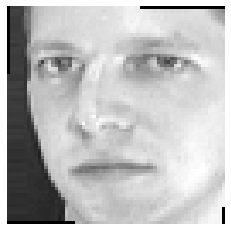

In [ ]:
angle = 270 # in degrees
new_data = ndimage.rotate(faces[1].reshape(64, 64), angle, reshape=True)
plt.imshow(new_data,cmap='gray')
plt.axis('off')
plt.show()

Let's define a fuction to display images.

In [ ]:
def display_image(X):
  rotated_img = ndimage.rotate(X.reshape(64, 64), 270, reshape=True)
  plt.imshow(rotated_img,cmap='gray')
  plt.axis('off')

Let's show average face.

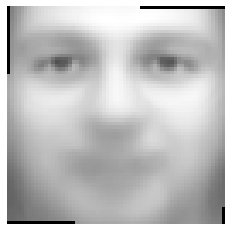

In [ ]:
avgFace = np.average(faces, axis=0)
new_data = ndimage.rotate(avgFace.reshape(64, 64), angle, reshape=True)
plt.imshow(new_data, cmap='gray')
plt.axis('off')
plt.show()

## Split train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(faces, test_size=0.3, random_state=42)
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')

X_train shape : (280, 4096)
X_test shape : (120, 4096)


## Dimentionality reduction using PCA

### n_components = 45

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=45, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'X_train shape after pca : {X_train_pca.shape}')
print(f'X_test shape after pca : {X_test_pca.shape}')
print(f"sum of explained variance ratio of 45 first pcs : {sum(pca.explained_variance_ratio_)*100}%")

X_train shape after pca : (280, 45)
X_test shape after pca : (120, 45)
sum of explained variance ratio of 45 first pcs : 86.84704019711118%


In [ ]:
# reconstruct the data
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

print(f'X_train shape after reconstruction : {X_train_reconstructed.shape}')
print(f'X_test shape after reconstruction : {X_test_reconstructed.shape}')

X_train shape after reconstruction : (280, 4096)
X_test shape after reconstruction : (120, 4096)


In [ ]:
def image_before_after_reconstuction(X_original, X_reconstructed):
  """show original image and reconsturcted image"""
  plt.subplot(1, 2, 1) # n is the position of your subplot (1 to 2)
  display_image(X_original)
  plt.title('original')

  plt.subplot(1, 2, 2)
  display_image(X_reconstructed)
  plt.title('after reconstruction')

  plt.show()

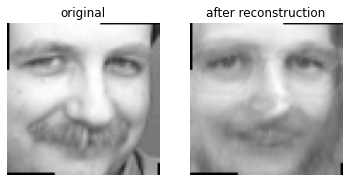

In [ ]:
#one of test data
image_before_after_reconstuction(X_test[100], X_test_reconstructed[100])

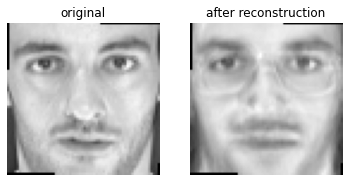

In [ ]:
# one of train data
image_before_after_reconstuction(X_train[140], X_train_reconstructed[140])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(X_train, X_train_reconstructed))
rmse_test = sqrt(mean_squared_error(X_test, X_test_reconstructed))

print(f'RMSE for train data: {rmse_train}')
print(f'RMSE for test data: {rmse_test}')

RMSE for train data: 12.034734735151284
RMSE for test data: 14.819358105870775


## Number of components for PCA

### n_components = 280

`n_components` should be at most min(n_data, n_feature). In the following experiment we test for n_components =280

In [ ]:
pca = PCA(n_components=280, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'X_train shape after pca : {X_train_pca.shape}')
print(f'X_test shape after pca : {X_test_pca.shape}')
print(f"sum of explained variance ratio of 280 first pcs : {sum(pca.explained_variance_ratio_)*100}%")

X_train shape after pca : (280, 280)
X_test shape after pca : (120, 280)
sum of explained variance ratio of 280 first pcs : 100.0%


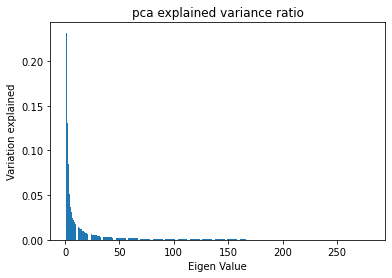

In [ ]:
plt.bar(list(range(1,281)),pca.explained_variance_ratio_)
plt.title('pca explained variance ratio')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

As we seen in above image, most of our information in 150 pcs.

In [ ]:
# reconstruct the data
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

print(f'X_train shape after reconstruction : {X_train_reconstructed.shape}')
print(f'X_test shape after reconstruction : {X_test_reconstructed.shape}')

X_train shape after reconstruction : (280, 4096)
X_test shape after reconstruction : (120, 4096)


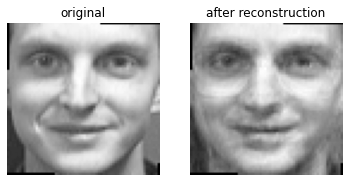

In [ ]:
#one of test data
image_before_after_reconstuction(X_test[30], X_test_reconstructed[30])

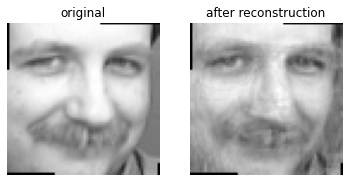

In [ ]:
#one of test data 
image_before_after_reconstuction(X_test[100], X_test_reconstructed[100])

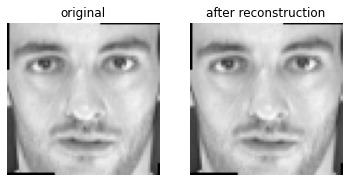

In [ ]:
# one of train data
image_before_after_reconstuction(X_train[140], X_train_reconstructed[140])

In [ ]:
rmse_train = sqrt(mean_squared_error(X_train, X_train_reconstructed))
rmse_test = sqrt(mean_squared_error(X_test, X_test_reconstructed))

print(f'RMSE for train data: {rmse_train}')
print(f'RMSE for test data: {rmse_test}')

RMSE for train data: 7.435043724775401e-14
RMSE for test data: 10.168196972451753


### n_components = 180

In [ ]:
pca = PCA(n_components=180, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'X_train shape after pca : {X_train_pca.shape}')
print(f'X_test shape after pca : {X_test_pca.shape}')
print(f"sum of explained variance ratio of 180 first pcs : {sum(pca.explained_variance_ratio_)*100}%")

X_train shape after pca : (280, 180)
X_test shape after pca : (120, 180)
sum of explained variance ratio of 180 first pcs : 98.45961903764602%


In [ ]:
# reconstruct the data
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

print(f'X_train shape after reconstruction : {X_train_reconstructed.shape}')
print(f'X_test shape after reconstruction : {X_test_reconstructed.shape}')

X_train shape after reconstruction : (280, 4096)
X_test shape after reconstruction : (120, 4096)


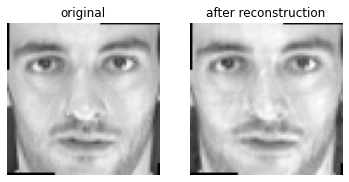

In [ ]:
# one of train data
image_before_after_reconstuction(X_train[140], X_train_reconstructed[140])

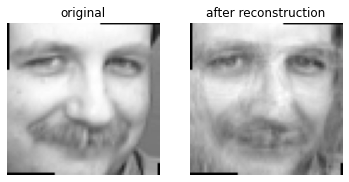

In [ ]:
# one of test data 
image_before_after_reconstuction(X_test[100], X_test_reconstructed[100])

In [ ]:
rmse_train = sqrt(mean_squared_error(X_train, X_train_reconstructed))
rmse_test = sqrt(mean_squared_error(X_test, X_test_reconstructed))

print(f'RMSE for train data: {rmse_train}')
print(f'RMSE for test data: {rmse_test}')

RMSE for train data: 4.118497882207714
RMSE for test data: 11.112393430149453


### n_components =150

In [ ]:
pca = PCA(n_components=150, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'X_train shape after pca : {X_train_pca.shape}')
print(f'X_test shape after pca : {X_test_pca.shape}')
print(f"sum of explained variance ratio of 150 first pcs : {sum(pca.explained_variance_ratio_)*100}%")

X_train shape after pca : (280, 150)
X_test shape after pca : (120, 150)
sum of explained variance ratio of 150 first pcs : 97.42758635989229%


In [ ]:
# reconstruct the data
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

print(f'X_train shape after reconstruction : {X_train_reconstructed.shape}')
print(f'X_test shape after reconstruction : {X_test_reconstructed.shape}')

X_train shape after reconstruction : (280, 4096)
X_test shape after reconstruction : (120, 4096)


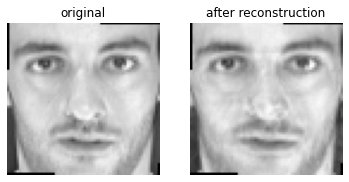

In [ ]:
# one of train data
image_before_after_reconstuction(X_train[140], X_train_reconstructed[140])

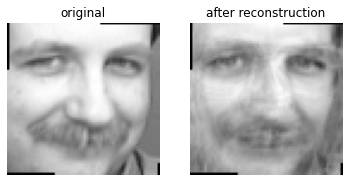

In [ ]:
# one of test data 
image_before_after_reconstuction(X_test[100], X_test_reconstructed[100])

In [ ]:
rmse_train = sqrt(mean_squared_error(X_train, X_train_reconstructed))
rmse_test = sqrt(mean_squared_error(X_test, X_test_reconstructed))

print(f'RMSE for train data: {rmse_train}')
print(f'RMSE for test data: {rmse_test}')

RMSE for train data: 5.322248859934032
RMSE for test data: 11.534391133712393


### n_components =100

In [ ]:
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'X_train shape after pca : {X_train_pca.shape}')
print(f'X_test shape after pca : {X_test_pca.shape}')
print(f"sum of explained variance ratio of 100 first pcs : {sum(pca.explained_variance_ratio_)*100}%")

X_train shape after pca : (280, 100)
X_test shape after pca : (120, 100)
sum of explained variance ratio of 100 first pcs : 94.5227249410582%


In [ ]:
# reconstruct the data
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

print(f'X_train shape after reconstruction : {X_train_reconstructed.shape}')
print(f'X_test shape after reconstruction : {X_test_reconstructed.shape}')

X_train shape after reconstruction : (280, 4096)
X_test shape after reconstruction : (120, 4096)


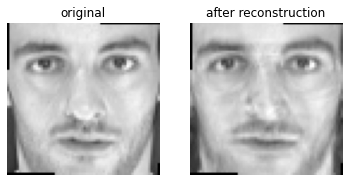

In [ ]:
# one of train data
image_before_after_reconstuction(X_train[140], X_train_reconstructed[140])

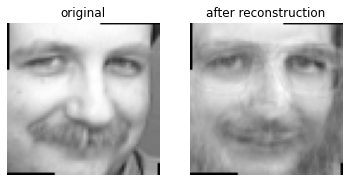

In [ ]:
# one of test data 
image_before_after_reconstuction(X_test[100], X_test_reconstructed[100])

In [ ]:
rmse_train = sqrt(mean_squared_error(X_train, X_train_reconstructed))
rmse_test = sqrt(mean_squared_error(X_test, X_test_reconstructed))

print(f'RMSE for train data: {rmse_train}')
print(f'RMSE for test data: {rmse_test}')

RMSE for train data: 7.766172830513557
RMSE for test data: 12.52966426936161
